<a href="https://www.kaggle.com/code/wm0395/notebook5daae8a20e?scriptVersionId=124596018" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clickin?g run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json


In [2]:
##load data into dataframe
df = pd.read_json('/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json',lines = True)
#df = cudf.DataFrame.from_pandas(pd_df)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
##get details on classes

id2c = []
c2id = dict(df['category'].value_counts())
iter = 0
for c in df['category'].value_counts().keys():
    id2c.append(c)
    c2id[c] = iter
    iter +=1
print(c2id, id2c)


{'POLITICS': 0, 'WELLNESS': 1, 'ENTERTAINMENT': 2, 'TRAVEL': 3, 'STYLE & BEAUTY': 4, 'PARENTING': 5, 'HEALTHY LIVING': 6, 'QUEER VOICES': 7, 'FOOD & DRINK': 8, 'BUSINESS': 9, 'COMEDY': 10, 'SPORTS': 11, 'BLACK VOICES': 12, 'HOME & LIVING': 13, 'PARENTS': 14, 'THE WORLDPOST': 15, 'WEDDINGS': 16, 'WOMEN': 17, 'CRIME': 18, 'IMPACT': 19, 'DIVORCE': 20, 'WORLD NEWS': 21, 'MEDIA': 22, 'WEIRD NEWS': 23, 'GREEN': 24, 'WORLDPOST': 25, 'RELIGION': 26, 'STYLE': 27, 'SCIENCE': 28, 'TECH': 29, 'TASTE': 30, 'MONEY': 31, 'ARTS': 32, 'ENVIRONMENT': 33, 'FIFTY': 34, 'GOOD NEWS': 35, 'U.S. NEWS': 36, 'ARTS & CULTURE': 37, 'COLLEGE': 38, 'LATINO VOICES': 39, 'CULTURE & ARTS': 40, 'EDUCATION': 41} ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING', 'PARENTS', 'THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'CRIME', 'IMPACT', 'DIVORCE', 'WORLD NEWS', 'MEDIA', 'WEIRD NEWS',

In [4]:
##Preprocessing
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet

In [5]:
def toke(dataf):
    tokenizer = RegexpTokenizer(r'\w+')
    dataf['combined'] = dataf['headline'] + dataf['short_description']
    dataf['tokenized'] = dataf['combined'].apply(lambda x: tokenizer.tokenize(x))
    return dataf
def stop(dataf):
    dataf['stop_words_removed'] = dataf['tokenized'].apply(lambda text:[word for word in text if word not in nltk.corpus.stopwords.words('english')])
    return dataf
def stem(dataf):
    ps = PorterStemmer()
    dataf['stemmed'] = dataf['stop_words_removed'].apply(lambda text: [ps.stem(word) for word in text])
    return dataf
def lem(dataf):
    word_net = WordNetLemmatizer()
    dataf['lemmatized'] = dataf['stemmed'].apply(lambda text: [word_net.lemmatize(word) for word in text])
    return dataf

In [6]:
def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [7]:
from multiprocessing import  Pool
df = parallelize_dataframe(df,toke)
df.head()

,link,headline,category,short_description,authors,date,combined,tokenized
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[Over, 4, Million, Americans, Roll, Up, Sleeve..."
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[American, Airlines, Flyer, Charged, Banned, F..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[23, Of, The, Funniest, Tweets, About, Cats, A..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[The, Funniest, Tweets, From, Parents, This, W..."
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[Woman, Who, Called, Cops, On, Black, Bird, Wa..."


In [8]:
df = parallelize_dataframe(df,stop)
df.head()

,link,headline,category,short_description,authors,date,combined,tokenized,stop_words_removed
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Over, 4, Million, Americans, Roll, Up, Sleeve..."
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[American, Airlines, Flyer, Charged, Banned, F...","[American, Airlines, Flyer, Charged, Banned, F..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, The, Funniest, Tweets, About, Cats, A..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[The, Funniest, Tweets, From, Parents, This, W...","[The, Funniest, Tweets, From, Parents, This, W..."
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[Woman, Who, Called, Cops, On, Black, Bird, Wa..."


In [9]:
df = parallelize_dataframe(df,stem)
df.head()

,link,headline,category,short_description,authors,date,combined,tokenized,stop_words_removed,stemmed
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Over, 4, Million, Americans, Roll, Up, Sleeve...","[over, 4, million, american, roll, Up, sleev, ..."
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[American, Airlines, Flyer, Charged, Banned, F...","[American, Airlines, Flyer, Charged, Banned, F...","[american, airlin, flyer, charg, ban, for, lif..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, the, funniest, tweet, about, cat, and..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[The, Funniest, Tweets, From, Parents, This, W...","[The, Funniest, Tweets, From, Parents, This, W...","[the, funniest, tweet, from, parent, thi, week..."
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[woman, who, call, cop, On, black, bird, watch..."


In [10]:
!mkdir /kaggle/working/nltk_data
nltk.download("wordnet", "/kaggle/working/nltk_data/")
nltk.data.path.append("/kaggle/working/nltk_data/")
import zipfile

z= zipfile.ZipFile('/kaggle/working/nltk_data/corpora/wordnet.zip')
z.extractall('/kaggle/working/nltk_data/corpora/')

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...


In [11]:
df = parallelize_dataframe(df,lem)
df.head()

,link,headline,category,short_description,authors,date,combined,tokenized,stop_words_removed,stemmed,lemmatized
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Over, 4, Million, Americans, Roll, Up, Sleeve...","[over, 4, million, american, roll, Up, sleev, ...","[over, 4, million, american, roll, Up, sleev, ..."
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[American, Airlines, Flyer, Charged, Banned, F...","[American, Airlines, Flyer, Charged, Banned, F...","[american, airlin, flyer, charg, ban, for, lif...","[american, airlin, flyer, charg, ban, for, lif..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, the, funniest, tweet, about, cat, and...","[23, Of, the, funniest, tweet, about, cat, and..."
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[The, Funniest, Tweets, From, Parents, This, W...","[The, Funniest, Tweets, From, Parents, This, W...","[the, funniest, tweet, from, parent, thi, week...","[the, funniest, tweet, from, parent, thi, week..."
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[woman, who, call, cop, On, black, bird, watch...","[woman, who, call, cop, On, black, bird, watch..."


In [12]:
df['input'] = df['lemmatized'].apply(lambda text: " ".join(word for word in text))
df['output'] = df['category'].apply(lambda x: c2id[x])

In [13]:
df.head()

,link,headline,category,short_description,authors,date,combined,tokenized,stop_words_removed,stemmed,lemmatized,input,output
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,"[Over, 4, Million, Americans, Roll, Up, Sleeve...","[Over, 4, Million, Americans, Roll, Up, Sleeve...","[over, 4, million, american, roll, Up, sleev, ...","[over, 4, million, american, roll, Up, sleev, ...",over 4 million american roll Up sleev for omic...,36
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...","[American, Airlines, Flyer, Charged, Banned, F...","[American, Airlines, Flyer, Charged, Banned, F...","[american, airlin, flyer, charg, ban, for, lif...","[american, airlin, flyer, charg, ban, for, lif...",american airlin flyer charg ban for life after...,36
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,"[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, The, Funniest, Tweets, About, Cats, A...","[23, Of, the, funniest, tweet, about, cat, and...","[23, Of, the, funniest, tweet, about, cat, and...",23 Of the funniest tweet about cat and dog thi...,10
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,"[The, Funniest, Tweets, From, Parents, This, W...","[The, Funniest, Tweets, From, Parents, This, W...","[the, funniest, tweet, from, parent, thi, week...","[the, funniest, tweet, from, parent, thi, week...",the funniest tweet from parent thi week sept 1...,5
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,"[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[Woman, Who, Called, Cops, On, Black, Bird, Wa...","[woman, who, call, cop, On, black, bird, watch...","[woman, who, call, cop, On, black, bird, watch...",woman who call cop On black bird watcher lose ...,36


In [14]:
df.to_json(r'\kaggle\working\processed.json')

**TRANSFER LEARNING ON DISTILBERT(General Model)**

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig, TFAutoModelWithLMHead, TFAutoModel, AutoModel

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.metrics import Accuracy, Recall, Precision, TruePositives, FalsePositives, TrueNegatives, FalseNegatives 

classifier = pipeline('sentiment-analysis')

import random
random.seed(42)

In [16]:
MAX_LENGTH = 128
CLASSES = 42
## SET UP THE MODEL
save_directory = "distilbert-base-uncased"

# # detect and init the TPU
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# # instantiate a distribution strategy
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# # instantiating the model in the strategy scope creates the model on the TPU
# with tpu_strategy.scope():

config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
transformer_model = TFAutoModel.from_pretrained(save_directory, from_pt=True, config = config)

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 
# Build model that will go on top of DistilBERT
embedding_layer = transformer_model(input_ids_in, attention_mask=input_masks_in)[0]
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(embedding_layer)
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(50, activation='relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(CLASSES, activation='softmax')(X)
tf.keras.layers.Softmax(axis=-1)
model = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model.layers[:3]:
    layer.trainable = False

model.compile(optimizer="Adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[Accuracy(), Precision(), Recall(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()],steps_per_execution=32)
print(model.summary())

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 masked_token (InputLayer)      [(None, 128)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_token[0][0]',            
 BertModel)                     ast_hidden_state=(N               'masked_token[0][0]']           
                                one, 128, 768),                                                   
                                 hidden_states=None                                           

In [17]:
##### LOAD THE TEST DATA #####
X_train, X_test, y_train, y_test = train_test_split(df["input"], df["output"], test_size=0.20, random_state=42)

In [17]:
# Create X values
tokenizer = AutoTokenizer.from_pretrained(save_directory)
X_train = tokenizer(
     list(X_train),
     padding=True,
     truncation=True,
     return_tensors="tf",
     max_length = MAX_LENGTH
 )

X_test = tokenizer(
     list(X_test),
     padding=True,
     truncation=True,
     return_tensors="tf",
     max_length = MAX_LENGTH
 )
# Create Y values
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [18]:
#BATCH_SIZE = 16 * tpu_strategy.num_replicas_in_sync
#### TRAIN THE MODEL ####
history = model.fit([X_train["input_ids"],   X_train["attention_mask"]], 
          y_train, 
          batch_size=128, 
          epochs=4, 4
          verbose=1, 
          validation_split=0.2)

Epoch 1/4
1048/1048 [==============================] - 1460s 1s/step - loss: 2.2121 - accuracy: 0.0000e+00 - precision: 0.7091 - recall: 0.2216 - true_positives: 29717.0000 - true_negatives: 5485742.0000 - false_positives: 12194.0000 - false_negatives: 104379.0000 - val_loss: 1.7319 - val_accuracy: 0.0000e+00 - val_precision: 0.7394 - val_recall: 0.3380 - val_true_positives: 11331.0000 - val_true_negatives: 1370531.0000 - val_false_positives: 3994.0000 - val_false_negatives: 22194.0000
Epoch 2/4
1048/1048 [==============================] - 1472s 1s/step - loss: 1.8205 - accuracy: 0.0000e+00 - precision: 0.7298 - recall: 0.3182 - true_positives: 42670.0000 - true_negatives: 5482134.0000 - false_positives: 15802.0000 - false_negatives: 91426.0000 - val_loss: 1.5876 - val_accuracy: 0.0000e+00 - val_precision: 0.7609 - val_recall: 0.3759 - val_true_positives: 12602.0000 - val_true_negatives: 1370566.0000 - val_false_positives: 3959.0000 - val_false_negatives: 20923.0000
Epoch 3/4
1048/1048

In [21]:

model.save_weights('/kaggle/working/my_chp')

Result - 75% Accuracy
Recall = 0.3772
F1 can be calculated using TP,TN,FP and FN

# **Finetuning on Distilbert with a text classification pipeline**

Pre Processing for this pipeline

In [15]:
from datasets import Dataset, DatasetDict
df = pd.read_json('/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json',lines = True)
df['label'] = df['category'].apply(lambda x: c2id[x])
dataset = df.drop(['link', 'short_description', 'authors', 'date'], axis = 1)
dataset = Dataset.from_pandas(dataset)
dataset = dataset.rename_column("headline", 'text')
dataset = dataset.rename_column('category', 'label_name')
train_testvalid = dataset.train_test_split(0.3)
train_test_valid = train_testvalid['test'].train_test_split(0.5)
dataset = DatasetDict({
    "train": train_testvalid["train"],
    "test": train_test_valid["test"],
    "valid": train_test_valid["train"]})

In [16]:
dataset['train'][0]

{'text': 'RNC Catches Heat For Hawking Discounted Donald Trump Merchandise On Black Friday',
 'label_name': 'POLITICS',
 'label': 0}

In [17]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

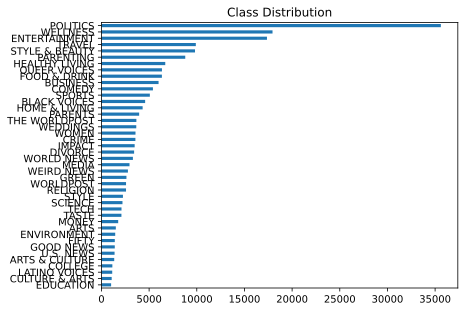

In [18]:
df['category'].value_counts(ascending=True).plot.barh()
plt.title('Class Distribution')
plt.show()

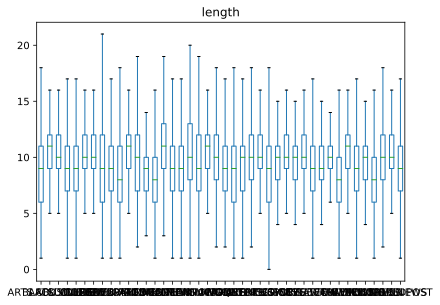

In [19]:
df['length'] = df['headline'].str.split().apply(len)
df.boxplot('length', by='category', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [20]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [21]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [22]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [23]:
import torch
import torch.nn as nn

In [24]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
    if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    return {"hidden state": last_hidden_state[:, 0].cpu().numpy()}

In [26]:
dataset_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

In [27]:
dataset_hidden = dataset_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/147 [00:00<?, ?ba/s]

  0%|          | 0/32 [00:00<?, ?ba/s]

  0%|          | 0/32 [00:00<?, ?ba/s]

In [28]:
X_train = np.array(dataset_hidden["train"]["hidden state"])
X_valid = np.array(dataset_hidden["valid"]["hidden state"])
y_train = np.array(dataset_hidden["train"]["label"])
y_valid = np.array(dataset_hidden["valid"]["label"])

In [29]:
from transformers import AutoModelForSequenceClassification

num_labels = 42
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    rec = recall_score(labels, preds, average='macro')
    pre = precision_score(labels, preds, average='macro')
    return {"accuracy": acc, "f1": f1, "precision": pre, "recall": rec}

In [31]:
from transformers import Trainer, TrainingArguments

batch_size = 128
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [37]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=dataset_encoded['train'],
    eval_dataset=dataset_encoded['valid'],
    tokenizer=tokenizer,
)

trainer.train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.719100,1.597212,0.571256,0.511611,0.383984,0.342810
2,1.572900,1.548491,0.577365,0.523418,0.428276,0.356459


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=2292, training_loss=1.6458663688696284, metrics={'train_runtime': 1768.9481, 'train_samples_per_second': 165.825, 'train_steps_per_second': 1.296, 'total_flos': 9873189105848640.0, 'train_loss': 1.6458663688696284, 'epoch': 2.0})

In [38]:
preds_output = trainer.predict(dataset_encoded["test"])

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
preds_output

PredictionOutput(predictions=array([[ 0.42658374,  2.9253435 , -0.51356786, ..., -1.3437793 ,
        -1.1053559 , -0.47776428],
       [ 0.28378165, -0.35392404,  0.23300022, ..., -0.71137214,
        -0.7974726 , -0.5749574 ],
       [ 0.6281779 ,  4.262274  , -0.5422182 , ..., -1.3139547 ,
        -1.1561683 , -1.0296826 ],
       ...,
       [ 0.6737362 ,  0.04625371,  0.40317363, ..., -0.5600419 ,
        -0.9826871 , -1.0449717 ],
       [ 2.9599025 , -0.37849334, -0.12677565, ..., -0.899565  ,
        -1.353656  , -1.1105877 ],
       [ 0.4140989 , -0.5420175 ,  0.570958  , ..., -0.41797546,
        -0.8542544 , -1.1716696 ]], dtype=float32), label_ids=array([ 1, 11,  6, ...,  7, 29,  2]), metrics={'test_loss': 1.8364453315734863, 'test_accuracy': 0.5348393254852052, 'test_f1': 0.44916683194422763, 'test_precision': 0.34493776079287125, 'test_recall': 0.28034124154770296, 'test_runtime': 42.2235, 'test_samples_per_second': 744.373, 'test_steps_per_second': 5.826})